**Model Diagnostic**

**Regression validation** or **regression diagnostic** is a set of procedures that are applied to assess the numerical results of a regression analysis. The procedure include methods of graphical and quantitative analysis or formal statistics hypothesis tests. In this section we focus on the two foremost methods, the graphical and the quantative analysis. Statistical hypothesis tests for regression problems are provided in the section on *hypothesis* tests.

**Coefficient of Determination**

The **Coefficient of Determination**, also denoted as $R^2$, is the proportion of variation in the observed values explained by the regression equation. In other words, $R^2$ is a statistical measure of how well the regression line approximates the real data points; thus, it is a measure of the goodness of fit of the model.

The total variation of the response variable $y$ is based on the deviation of each observed value $y_i$ from the mean value $\bar{y}$. This quantity is called **total sum of squares, SST,** and is given by

$$SST = \sum (y_i - \bar{y})^2.$$

This total sum of squares (SST) can decomposed into two parts: the deviation explained by the regression line, $\hat{y}_i - \bar{y}$, and the remaining unexplained deviation $y_i - \hat{y}_i$. Consequently, the amount of variation that is explained by the regression is called the **sum of squares due to regression,SSR,** and is given by

$$SST = \sum(\hat{y}_i - \bar{y})^2.$$

The ratio of the sum of squares due to regression (SSR) and the total sum of squares (SST) is called the **coefficient of determination** and is denoted $R^2.$

$$R^2 = \frac{SSR}{SST}$$

$R^2$ lies between $0$ and $1$. A value of near $0$ suggests that the regression equation is not capable of explaining the data. An $R^2$ of $1$ indicates that the regression line perfectly fits the data.

Just for the sake of completeness the variation in the observed values of the response variable not explained by the regression is called **sum of squared errors of prediction, SSE** and is given by

$$SSE = \sum(y_i - \hat{y}_i)^2.$$

Recall that the SSE quantity is minimized to obtain the best regression line to describe the data, also known as the **ordinary least squares method (OLS).**

**Diagnostic plots**

It is important to realize that you may run a linear regression analysis using any statistical software, which results in a bunch of numbers, including a $p$-value, thus you may immediately state if the results were significant (or not). Are we done after reporting significance of the results?

Consider a very famous data set, known as **Anscombe's quartet**. Anscombe's quartet consists of four data sets and has the following form:

In [6]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

For the four data sets $(x,y1),(x,y2),(x,y3)$ and $(x4,y4)$, the mean, variance, coefficient, intercept, and $R^2$ is almost the same. So are we done with analysis? No, not yet! No matter what, we should always check the model works well for data. Any easy way to do that is to visualize the data. Let us plot the Anscombe's data set, including the regession line.

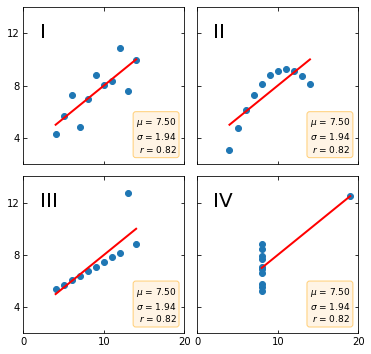

In [7]:
# taken from the matplotlib documentation

import matplotlib.pyplot as plt
import numpy as np

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)
    x_lin = np.array([np.min(x), np.max(x)])
    y_lin = p1 * x_lin + p0
    ax.plot(x_lin, y_lin, 'r-', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

What a surprise! The main takeaway of the exercise is to realize that we must check if a model works well for data in many different ways. We pay attention to regression results, such as slope coefficients, $p$-values, or $R^2$ that tell us how well a model represents the given data. However, that is not the whole story. We also need to apply visual diagnostics. The visual inspection helps to evaluate if linear regression assumptions are met or to identify **outliers** and/or **influential observations** and so called **leverage points**, that affect the numerical output of the regression analysis.

**Residual analysis**

A **residual** of an observed value is the difference between the observed value and the estimted value $(y_i - \hat{y}_i)$. It is the leftover after fitting a model to data. The sum of **squared errors of prediction (SSE),** also known as the **sum of squared residuals** or the **error sum of squares** is an indicator how well a model represents data.

If the absolute residuals, defined for observation $x_i$ as $e_i = y_i - \hat{y}_i$ are unsually large, it may be that the observation is from a different population, or that there was some error in making or recording the observation.

![anscombe_residual](anscombe_residual.png)

Look at the two plots above, obviously one data point in Anscombe’s data set #3 (right plot) shows a unusually large residue. Such a data point needs special attention as it influences the regression analysis. There is no overarching rule how to deal with outliers, but depending on the domain knowledge of the researcher, there are cases were on may decide to exclude such an outlier from the analysis.

In addition we may analyse the residuals to check if linear regression assumptions are met. Regression residuals should be approximately normally-distributed; that is, the regression should explain the structure and whatever is left over should just be noise, caused by measurement errors or many small uncorrelated factors. The normality of residuals can be checked graphically by a plot of the residuals against the values of the predictor variable. In such a **residual plot**, the residuals should be randomly scattered about 0 and the variation around 0 should be equal.

Prior to plotting the residuals it is common to standardize the residuals.

- A plot of the residuals **(residual plot)** against the values of the predictor variable should fall roughly in a horizontal band centered and symmetric about the $x$-axis.

- A **normal probability plot** of the residuals should be roughly linear.

![residual_plot](residual_plot.png)

Only in the uppermost plot the residuals are fairly well distributed around zero, whereas in the two lower plots that is not the case; thus, indicating that the linear model assumptions are not fulfilled.

![normal_prob_plots_residual](normal_prob_plots_residual.png)

The normal probability plots, often referred to as **Q-Q plots**, indicate that only in the left plot the data points fall roughly on a straight line. This is not the case for the other plots; thus, indicating that the linear model assumptions are not fulfilled.

**Outliers and influential points**

**Outliers** are points that fall away from the cloud of data points. Outliers that fall horizontally away from the center of the cloud, which do not influence the slope of the regression line are called **leverage points**. Outliers that actually influence the slope of the regression line are called **influential points**, which usually are high leverage points.

![outlier_influential](outlier_influential.png)

The figure above clearly shows the impact of different types of outliers. The black dashed line shows the regression line without outliers, the blue dashed line shows the regression line, when the blue leverage points are included, the green dashed line shows the regression line, when the green influential points are included and the red line show the final regression line, when all data is included. Obviously the largest effect on the slope of the regression line is due to the green dots!

**Leverage**

The **leverage** of an observation indicates its ability to move the regression model. These observations are not necessarily an error, but they should be identified and verified. The leverage is measured by the hat value, which measures the overall influence of a single observation on the model predictions. The hat value takes values between $0$ and $1$. A point with zero leverage has no effect on the regression model. The higher the hat value the higher the influence of that particular point on the regression model.

**Cook’s distance**

Another method to capture influential outliers is **Cook’s distance**. The measurement is a combination of the leverage and residue of each particular observation. The higher the leverage and residue, the higher Cook’s distance.

**There are other useful regression diagnostics** but we won't go into them for now.